In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("Plots")

using Plots

  Activating project at `~/Documents/GitHub/Phys215-202223-1/00-Intro`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/GitHub/Phys215-202223-1/00-Intro/Project.toml`
  No Changes to `~/Documents/GitHub/Phys215-202223-1/00-Intro/Manifest.toml`


# Logistic return map chaos

Chaos is the sensitivity of a system to initial condition.
One of the simplest system that exhibits chaos is the [Logistic Map](https://en.wikipedia.org/wiki/Logistic_map).
The logistic map is a discrete-time (iteration based) relation of the quantity being such that:
$$x_{t+1} = f(x_{t})$$
where the $f(x_{t})$ is the function that provides the new value of $x$ at a later time $t+1$ given the state at $t$.
In general, $x_t$ may be a vector.

For simplicity, we choose a one-dimensional chaotic system:
$$x_{t+1} = rx_t(1-x_t)$$
where $x_t$ is most commonly associated with a self-limiting growth of a system (e.g. population, mass, etc).

# Implementation

One intuitive way to implement this is to create a vector, say `x` from length one (or length zero) such that `x = [x_1]` (or `x = []`) with `x_1` as the first value.
The following gives the one that starts with length zero.

In [26]:
r = 3.7 # parameter

x = [ rand() ] # Start with a vector with initial value. Random value.

1-element Vector{Float64}:
 0.3056137272721148

Since the process involves updating of a former value, it is also important to set a variable for both the new and avoid serial update of variables.

In [31]:
# Let's try again..
xnew = rand()
x = [ xnew ] # Start.

# Mapping again..
xold = xnew # Ensure no serial update; Not necessary for 1D such as this
xnew = r*xold*(1-xold)
x = vcat(x,xnew) # Append to the last

2-element Vector{Float64}:
 0.6892027338342862
 0.7925486043856395

In [32]:
# Looping N times..
N = 200
for _ in 1:N
    xold = xnew;
    xnew = r*xold*(1-xold);
    x = vcat(x,xnew);
end

In [29]:
@show length(x);

length(x) = 202


# Plot of results

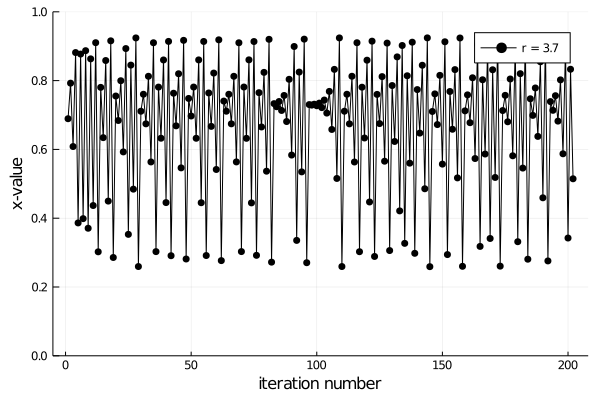

In [33]:
plt = plot( x
    ,markershape=:circle, markercolor=:black
    ,linecolor=:black
    ,label="r = "*string(r)
    ,xlabel="iteration number"
    ,ylabel="x-value"
    ,ylim=(0,1)
)

## Again..

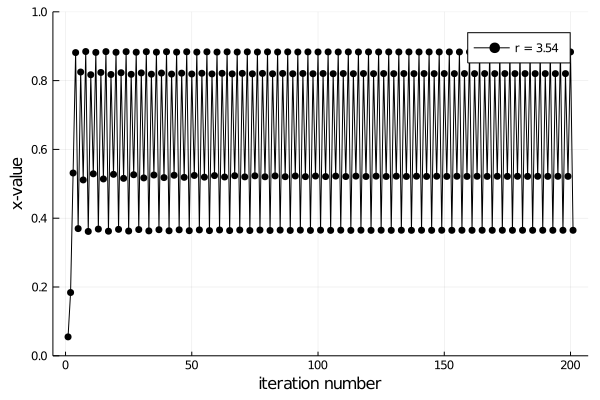

In [35]:
xnew = rand()
x = [ xnew ] # Start.

r = 3.54

# Looping N times..
N = 200
for _ in 1:N
    xold = xnew;
    xnew = r*xold*(1-xold);
    x = vcat(x,xnew);
end

plt = plot( x
    ,markershape=:circle, markercolor=:black
    ,linecolor=:black
    ,label="r = "*string(r)
    ,xlabel="iteration number"
    ,ylabel="x-value"
    ,ylim=(0,1)
)

## Packaging procedures as one function

_Object Oriented Programming (OOP) vs Julia programming_ is a topic that is important to distinguish.
Moving from `c` to `c++` (or `Java`) to `Python` makes a lot of difference.

[OOP paradigm](https://en.wikipedia.org/wiki/Object-oriented_programming#Features) --as usual in `Python` (strictly in `Java`)-- is important for three principles: (1) encapsulation, (2) inheritance, and (3) polymorphism.
While different from the classical OOP, the _Julia paradigm_ also provides a different kind of implementing the same principles.

One can think [Julia](https://en.wikipedia.org/wiki/Julia_(programming_language)) as a procedure-(or methods-)based programming (functional programming) due to the inherent use of functions and variables.
However, unlike the typical `c` programming paradigm, Julia considers everything as an object.
Julia, also reflects reality by way of using _prototype_ for all variables.
Other [features]("https://en.wikipedia.org/wiki/Julia_(programming_language)#Language_features") are listed in the Wiki entry.

All Julia Functions are objects that processes other objects (including Functions themselves0.
Here, we use Functions to package a set of procedures done to a given set of objects (parameters are objects, too).

Since we would like to use `generate()` as the function name, our defition should not clash with any existing one.

In [2]:
? generate

search: @generated

Couldn't find generate
Perhaps you meant @generated, enumerate, iterate or @animate


No documentation found.

Binding `generate` does not exist.


In [12]:
# input:
#   r::Float
#   N::Integer
# output:
#   x::Vector

function generate( r::Float64, N::Int )
    # generating first entry..
    xval = rand();
    x = [ xval ];
    for _ in 2:N
        xval = r * xval * (1 - xval)
        x = vcat(x, xval)
    end
    return x;
end

generate( r ) = generate( r, 200 ) # default to N = 200

generate (generic function with 3 methods)

In [13]:
function generate( r::String )
    println("This is a differently generated "*r*".")
end

generate (generic function with 4 methods)

In [15]:
generate("Hello")

This is a differently generated Hello.


In [16]:
function generate( r::Float64; N=300 )
    # generating first entry..
    xval = rand();
    x = [ xval ];
    for _ in 2:N
        xval = r * xval * (1 - xval)
        x = vcat(x, xval)
    end
    return x;
end

generate (generic function with 5 methods)

In [37]:
x = generate( 3.85 )

300-element Vector{Float64}:
 0.029006931217022136
 0.10843728725981337
 0.3722127716674524
 0.8996311334590786
 0.3476355851053165
 0.8731225775341328
 0.4265012372169975
 0.9417020376970665
 0.21136234309289806
 0.6417499666084358
 0.8851417458210533
 0.391413467159758
 0.9171045148100799
 ⋮
 0.1396492315363675
 0.4625671961205276
 0.9571053229958258
 0.15806068620219466
 0.5123483968660212
 0.9619129408151311
 0.1410502751639411
 0.46644711590445287
 0.9581656852801526
 0.15432418860230757
 0.5024566986460058
 0.9624767638322864

In [38]:
function plotLogistic( r, N )
    x = generate(r,N)
    plt = plot( x
        ,markershape=:circle, markercolor=:black
        ,linecolor=:black
        ,label="r = "*string(r)
        ,xlabel="iteration number"
        ,ylabel="x-value"
        ,ylim=(0,1)
    )
    return plt
end

plotLogistic(r) = plotLogistic(r,200)

plotLogistic (generic function with 2 methods)

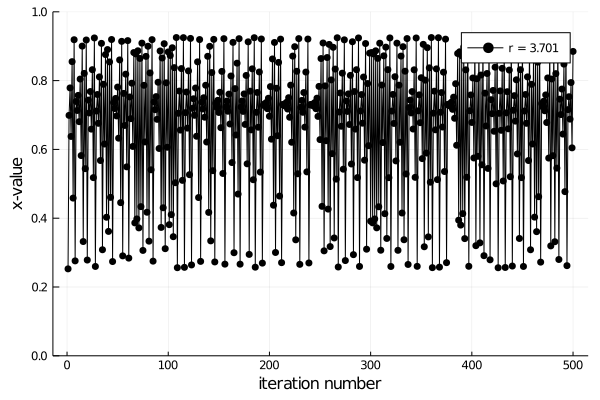

In [40]:
plotLogistic( 3.701, 500 )

# Fin

In [20]:
x = rand(2)

2-element Vector{Float64}:
 0.6973477974425615
 0.8285623035008813

In [23]:
y() = rand(2)

y (generic function with 1 method)

2-element Vector{Float64}:
 0.33424542487789477
 0.29409544707430957

In [25]:
y()

2-element Vector{Float64}:
 0.8766443536075078
 0.011475656414091984

In [46]:
0:0.1:1

0.0:0.1:1.0

In [45]:
?range

search: range LinRange UnitRange StepRange StepRangeLen trailing_zeros



```
range(start, stop, length)
range(start, stop; length, step)
range(start; length, stop, step)
range(;start, length, stop, step)
```

Construct a specialized array with evenly spaced elements and optimized storage (an [`AbstractRange`](@ref)) from the arguments. Mathematically a range is uniquely determined by any three of `start`, `step`, `stop` and `length`. Valid invocations of range are:

  * Call `range` with any three of `start`, `step`, `stop`, `length`.
  * Call `range` with two of `start`, `stop`, `length`. In this case `step` will be assumed to be one. If both arguments are Integers, a [`UnitRange`](@ref) will be returned.
  * Call `range` with one of `stop` or `length`. `start` and `step` will be assumed to be one.

See Extended Help for additional details on the returned type.

# Examples

```jldoctest
julia> range(1, length=100)
1:100

julia> range(1, stop=100)
1:100

julia> range(1, step=5, length=100)
1:5:496

julia> range(1, step=5, stop=100)
1:5:96

julia> range(1, 10, length=101)
1.0:0.09:10.0

julia> range(1, 100, step=5)
1:5:96

julia> range(stop=10, length=5)
6:10

julia> range(stop=10, step=1, length=5)
6:1:10

julia> range(start=1, step=1, stop=10)
1:1:10

julia> range(; length = 10)
Base.OneTo(10)

julia> range(; stop = 6)
Base.OneTo(6)

julia> range(; stop = 6.5)
1.0:1.0:6.0
```

If `length` is not specified and `stop - start` is not an integer multiple of `step`, a range that ends before `stop` will be produced.

```jldoctest
julia> range(1, 3.5, step=2)
1.0:2.0:3.0
```

Special care is taken to ensure intermediate values are computed rationally. To avoid this induced overhead, see the [`LinRange`](@ref) constructor.

!!! compat "Julia 1.1"
    `stop` as a positional argument requires at least Julia 1.1.


!!! compat "Julia 1.7"
    The versions without keyword arguments and `start` as a keyword argument require at least Julia 1.7.


!!! compat "Julia 1.8"
    The versions with `stop` as a sole keyword argument, or `length` as a sole keyword argument require at least Julia 1.8.


---

```
range(start::Color; stop::Color, length=100)
```

Generates `n`>2 colors in a linearly interpolated ramp from `start` to`stop`, inclusive, returning an `Array` of colors.

---

REPL.Message("Extended help is available with `??`", (color = :cyan, bold = true))
